In [11]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


The type of this input is <class 'numpy.ndarray'>
Shape: (507, 700, 3)


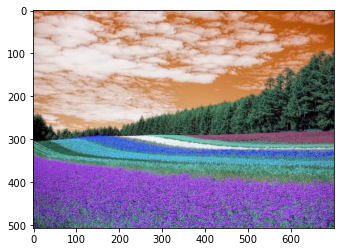

In [12]:
image = cv2.imread ('C:\\Users\\sathish\\Pictures\\image\\color detection image.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

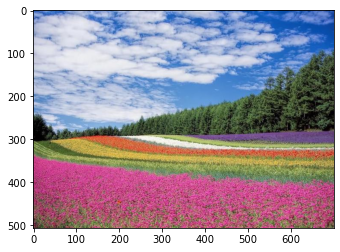

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

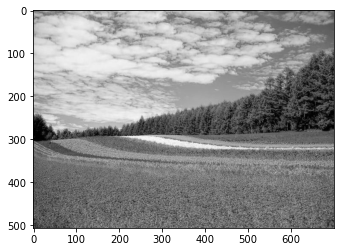

In [14]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

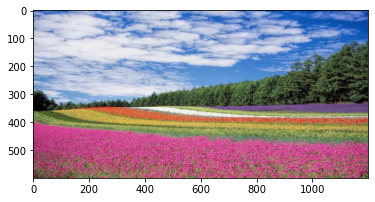

In [15]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [16]:

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [53]:
def  get_colors(image,number_of_colors,show_chart):
     modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
     modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(modified_image)
     counts = Counter(labels)

     center_colors = clf.cluster_centers_
     # We get ordered colors by iterating through the keys
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]

     if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

        return rgb_colors

[array([140.73103304, 167.73643087, 212.63903137]),
 array([ 92.31181474, 100.78098213,  74.42434713]),
 array([167.15585684, 156.3617254 ,  95.71411268]),
 array([204.30012173,  89.05546712, 142.65958111]),
 array([205.33115422, 212.01687397, 229.12580125]),
 array([36.93329177, 44.08665835, 28.43782589]),
 array([164.22216185,  77.7696153 ,  99.5440484 ]),
 array([ 65.58881517, 118.891109  , 193.83867299])]

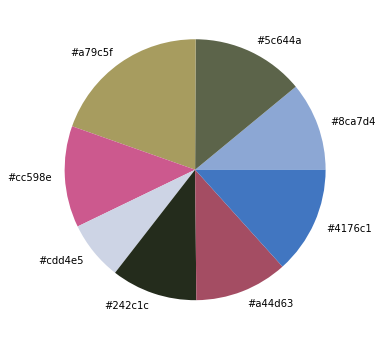

In [55]:
get_colors(get_image('C:\\Users\\sathish\\Pictures\\image\\color detection image.jpeg'), 8, True)